In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

%matplotlib inline

In [3]:
toy=pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
toy.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
toy.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [7]:
toy=toy[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [8]:
toy

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
toy.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [10]:
toy.rename(columns={'Age_08_04':'age','Quarterly_Tax':'qur'},inplace=True)
toy.tail()

,Price,age,KM,HP,cc,Doors,Gears,qur,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


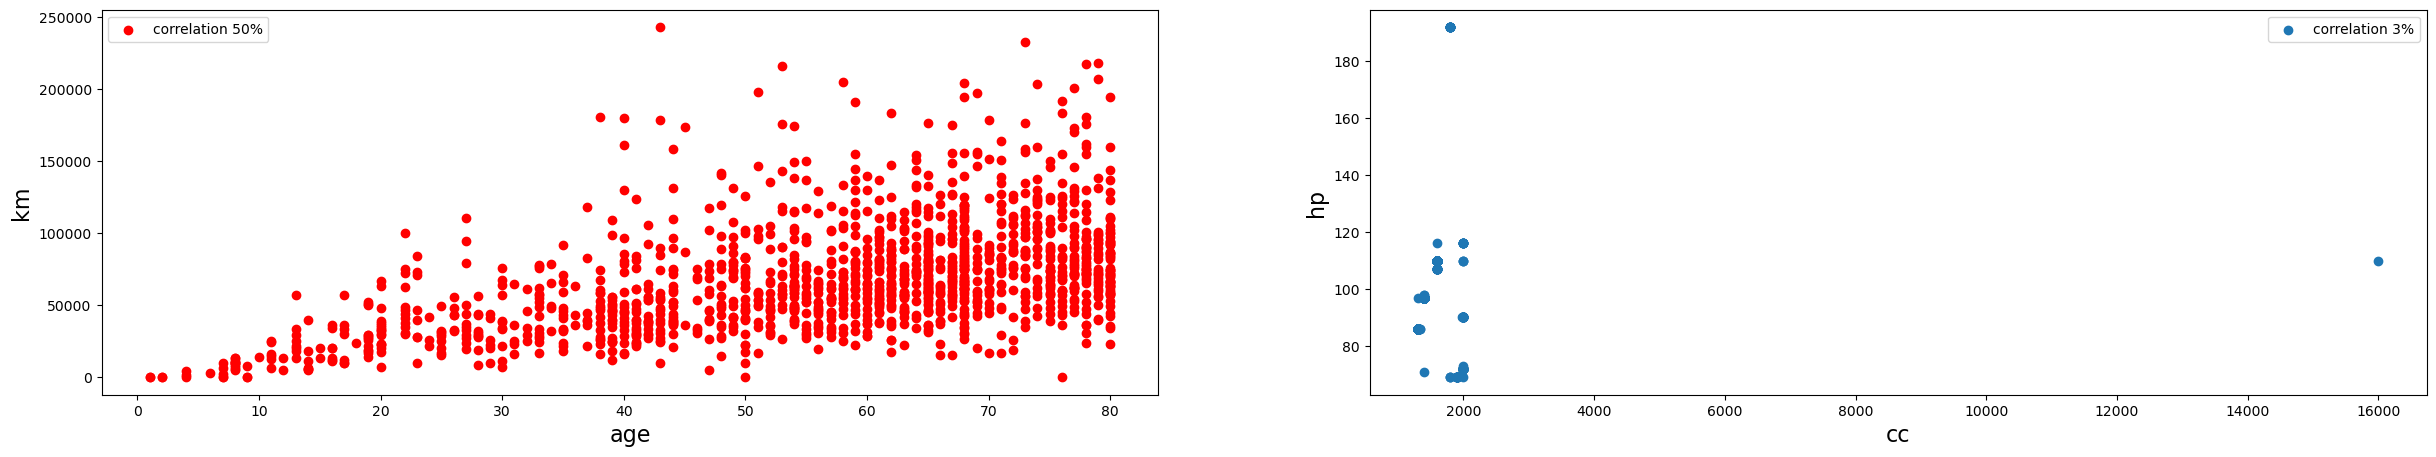

In [18]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.scatter(toy['age'],toy['KM'],color='red',label='correlation 50%')
plt.xlabel('age',size=16)
plt.ylabel('km',size=16)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.scatter(toy['cc'],toy['HP'],label='correlation 3%')
plt.xlabel('cc',size=16)
plt.ylabel('hp',size=16)
plt.legend(loc='best')





In [20]:
toy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   qur     1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [21]:
toy.isna().sum()

Price     0
age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
qur       0
Weight    0
dtype: int64

<AxesSubplot:>

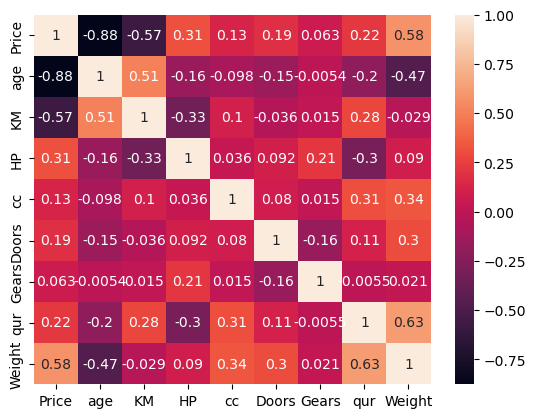

In [22]:
sns.heatmap(toy.corr(),annot=True)

In [23]:
toy.corr()

,Price,age,KM,HP,cc,Doors,Gears,qur,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qur,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


# scatterplot b&w variables along with histograms

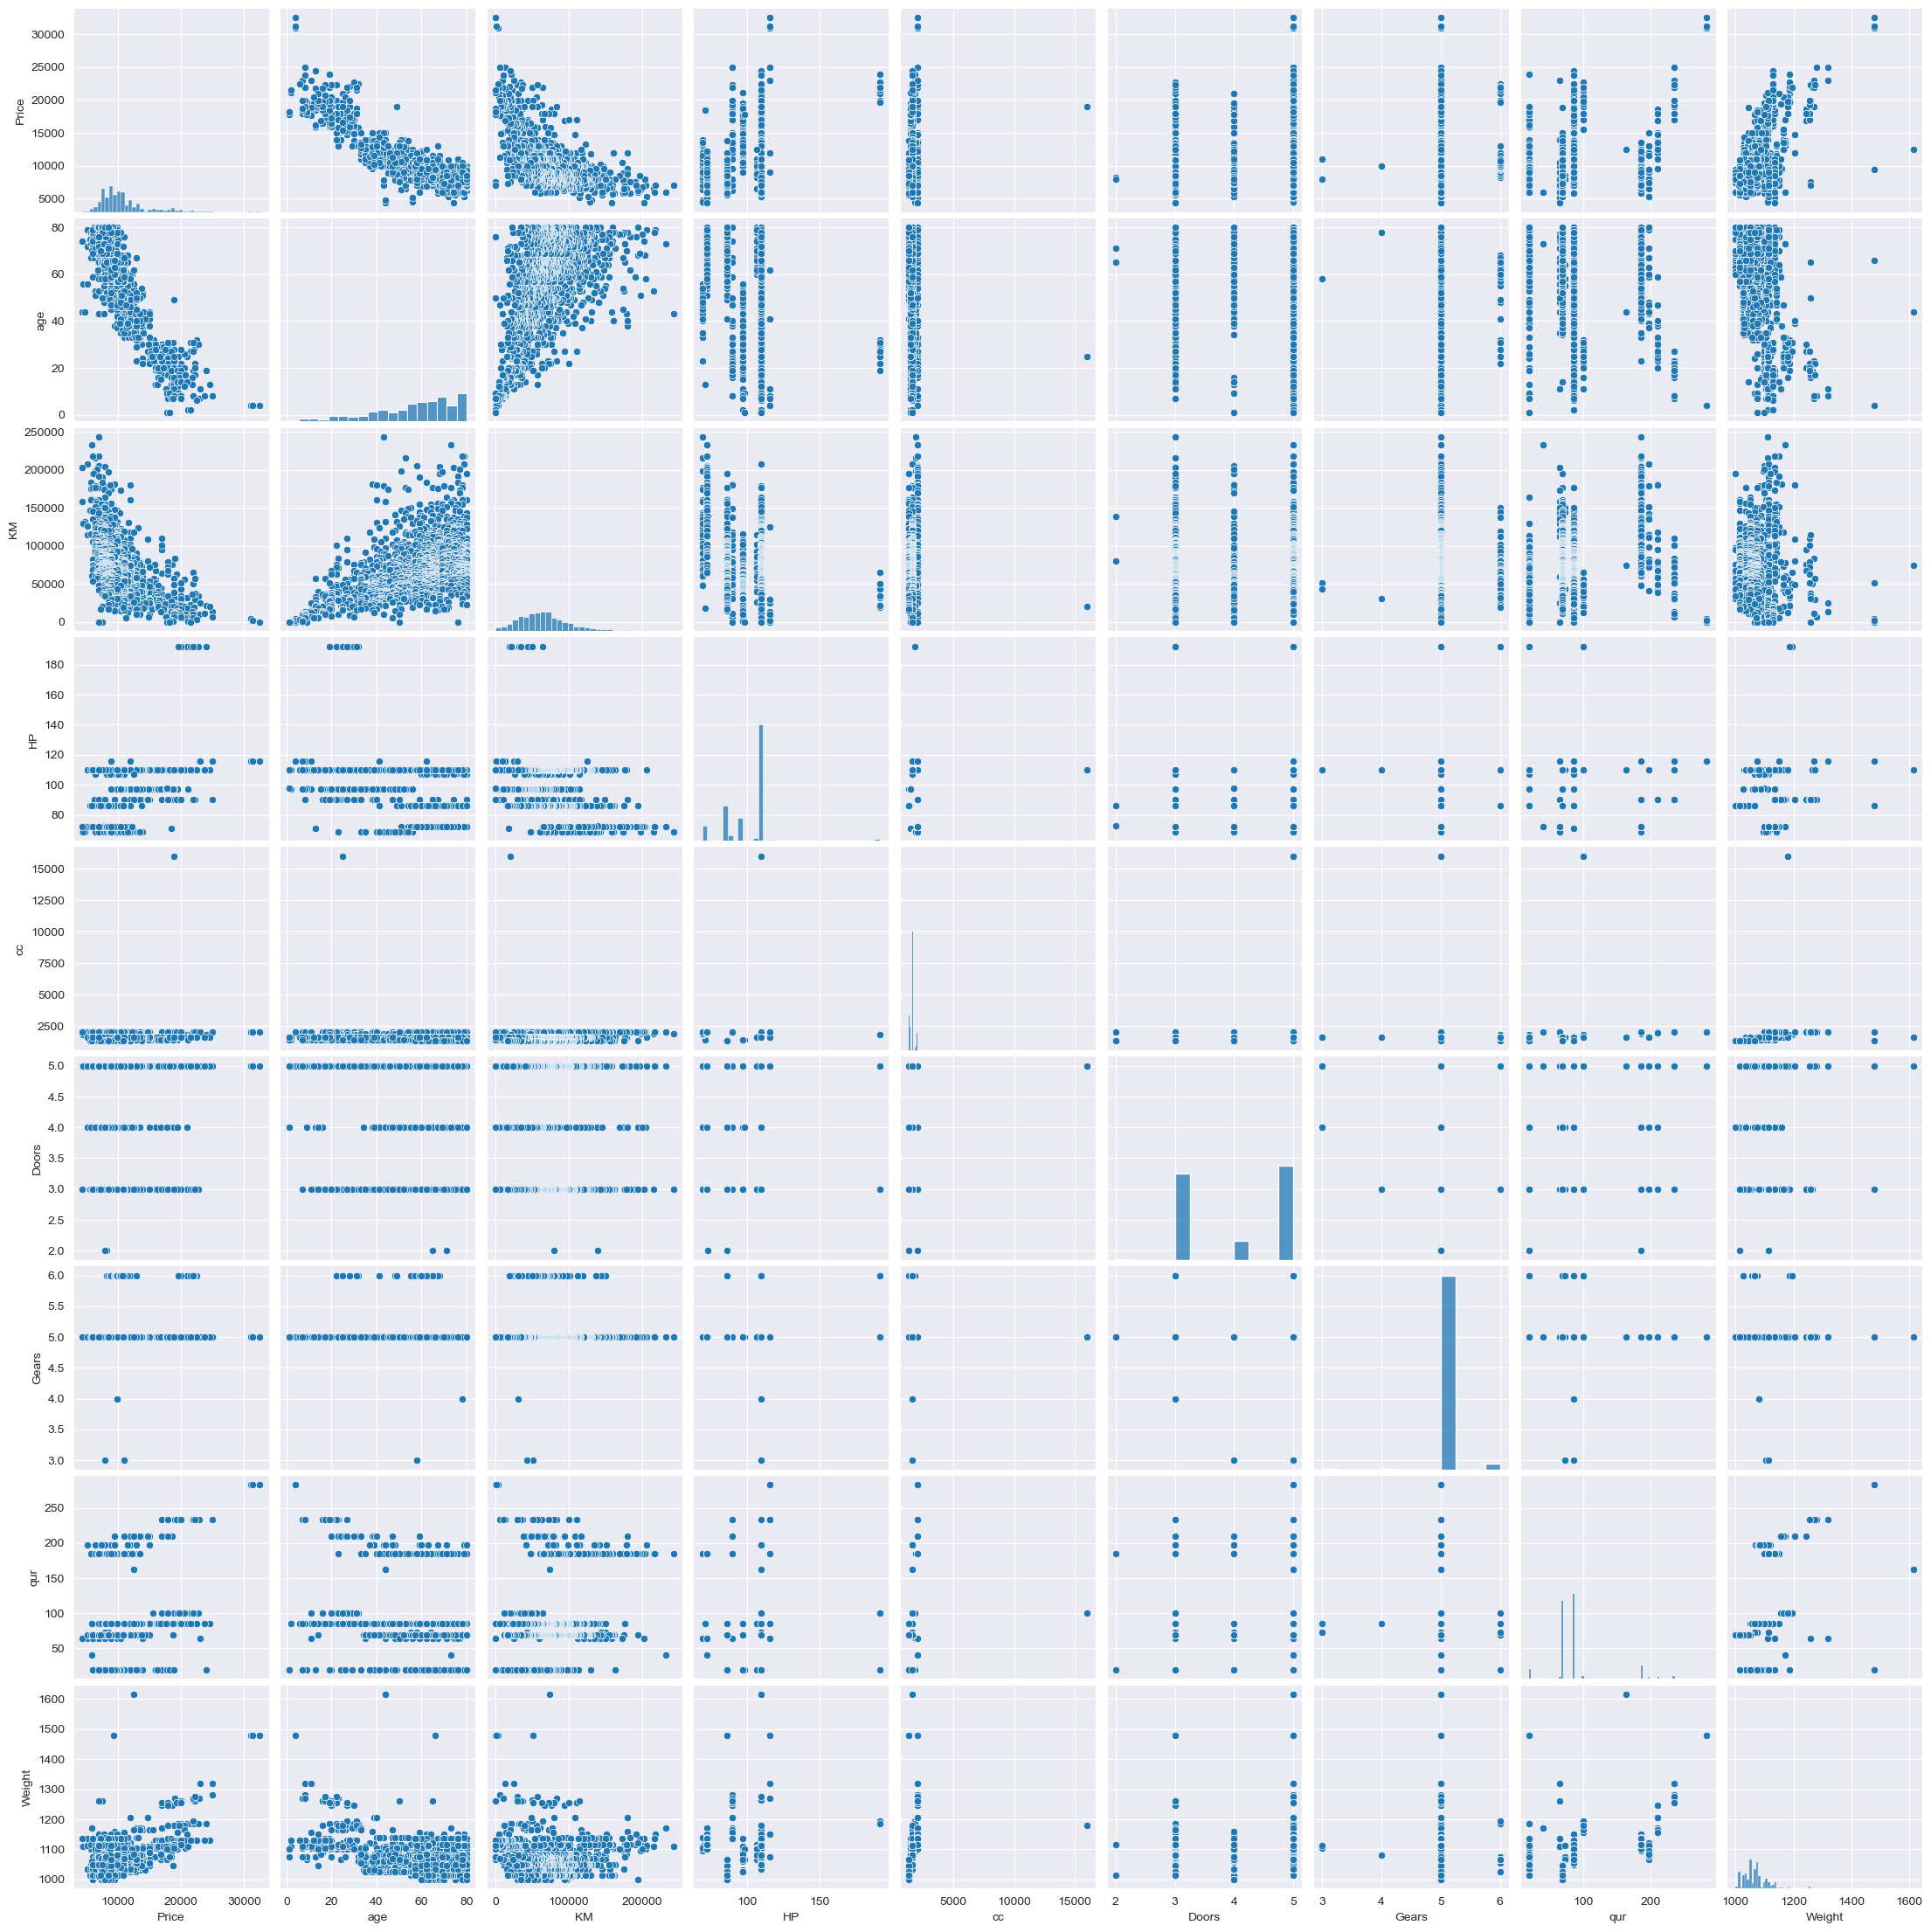

In [24]:
sns.set_style(style='darkgrid')
sns.pairplot(toy)

# preparing a model

In [25]:
import statsmodels.formula.api as smf
model=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qur+Weight',data=toy).fit()

In [26]:
model.rsquared

0.8637627463428192

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:35:43   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qur            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# calculating vif

In [31]:
rsq_age=smf.ols('age~KM+HP+cc+Doors+Gears+qur+Weight',data=toy).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~age+HP+cc+Doors+Gears+qur+Weight',data=toy).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~age+KM+cc+Doors+Gears+qur+Weight',data=toy).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~age+KM+HP+Doors+Gears+qur+Weight',data=toy).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~age+HP+KM+cc+Gears+qur+Weight',data=toy).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~age+KM+cc+Doors++HP+qur+Weight',data=toy).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_qur=smf.ols('qur~age+KM+cc+Doors+Gears+HP+Weight',data=toy).fit().rsquared
vif_qur=1/(1-rsq_qur)

rsq_Weight=smf.ols('Weight~age+KM+cc+Doors+Gears+HP+qur',data=toy).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

t2={'variables':['Weight','age','KM','cc','Doors','Gears','HP','qur'],'vif':[vif_Weight,vif_age,vif_KM,vif_cc,vif_Doors,vif_Gears,vif_HP,vif_qur]}
vif_frame=pd.DataFrame(t2)
vif_frame



,variables,vif
0,Weight,2.516420
1,age,1.884620
2,KM,1.756905
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,HP,1.419422
7,qur,2.311431


# test for normality of residuals(Q-Q plot)

(array([  1.,   1.,   0.,   1.,   2.,   0.,   3.,   9.,  33., 107., 247.,
        380., 328., 202.,  79.,  28.,   7.,   5.,   0.,   3.]),
 array([-9366.42208118, -8575.89988378, -7785.37768637, -6994.85548897,
        -6204.33329157, -5413.81109417, -4623.28889677, -3832.76669936,
        -3042.24450196, -2251.72230456, -1461.20010716,  -670.67790976,
          119.84428765,   910.36648505,  1700.88868245,  2491.41087985,
         3281.93307726,  4072.45527466,  4862.97747206,  5653.49966946,
         6444.02186686]),
 <BarContainer object of 20 artists>)

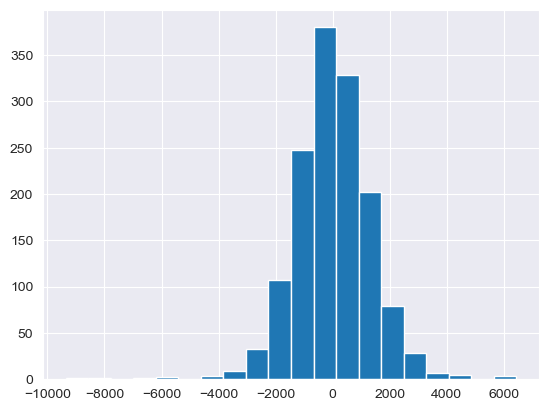

In [32]:
plt.hist(model.resid,bins=20)

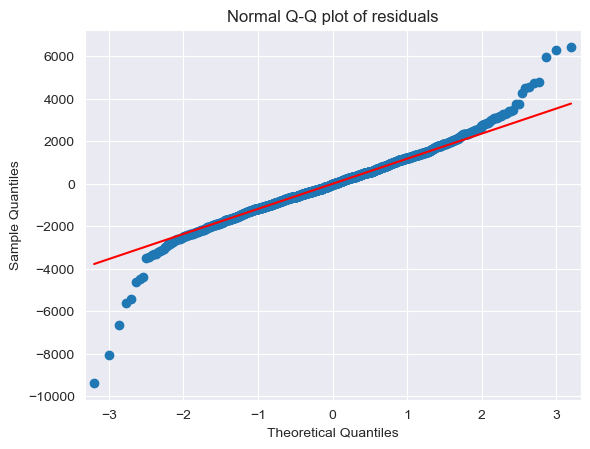

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# residual plot for homoscedasticity

In [34]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

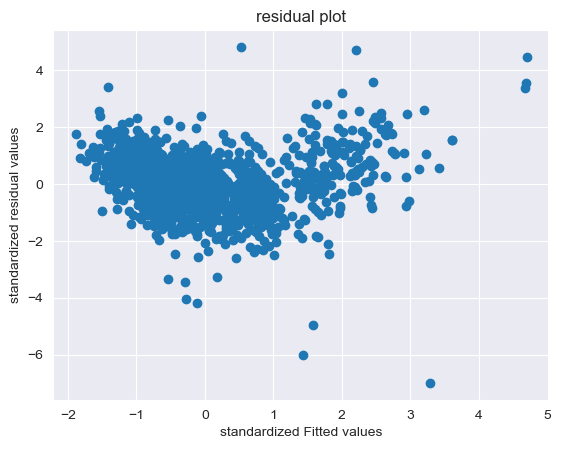

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('residual plot')
plt.xlabel('standardized Fitted values')
plt.ylabel('standardized residual values')
plt.show

# residual vs regressors

eval_env: 1


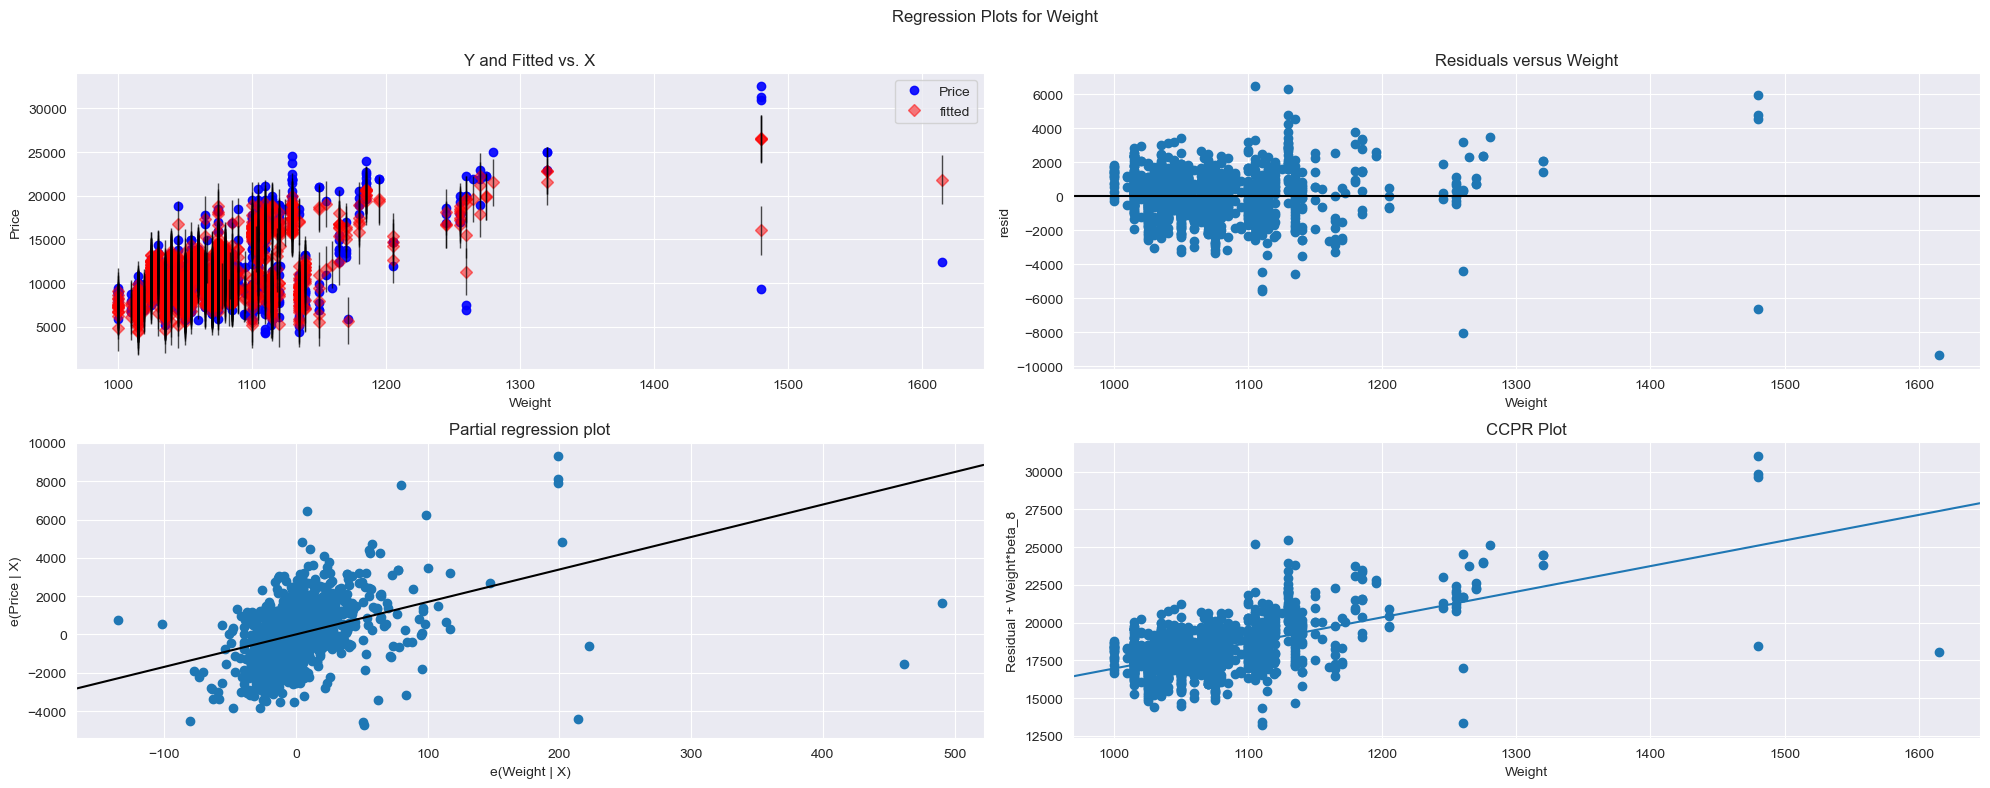

In [36]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

eval_env: 1


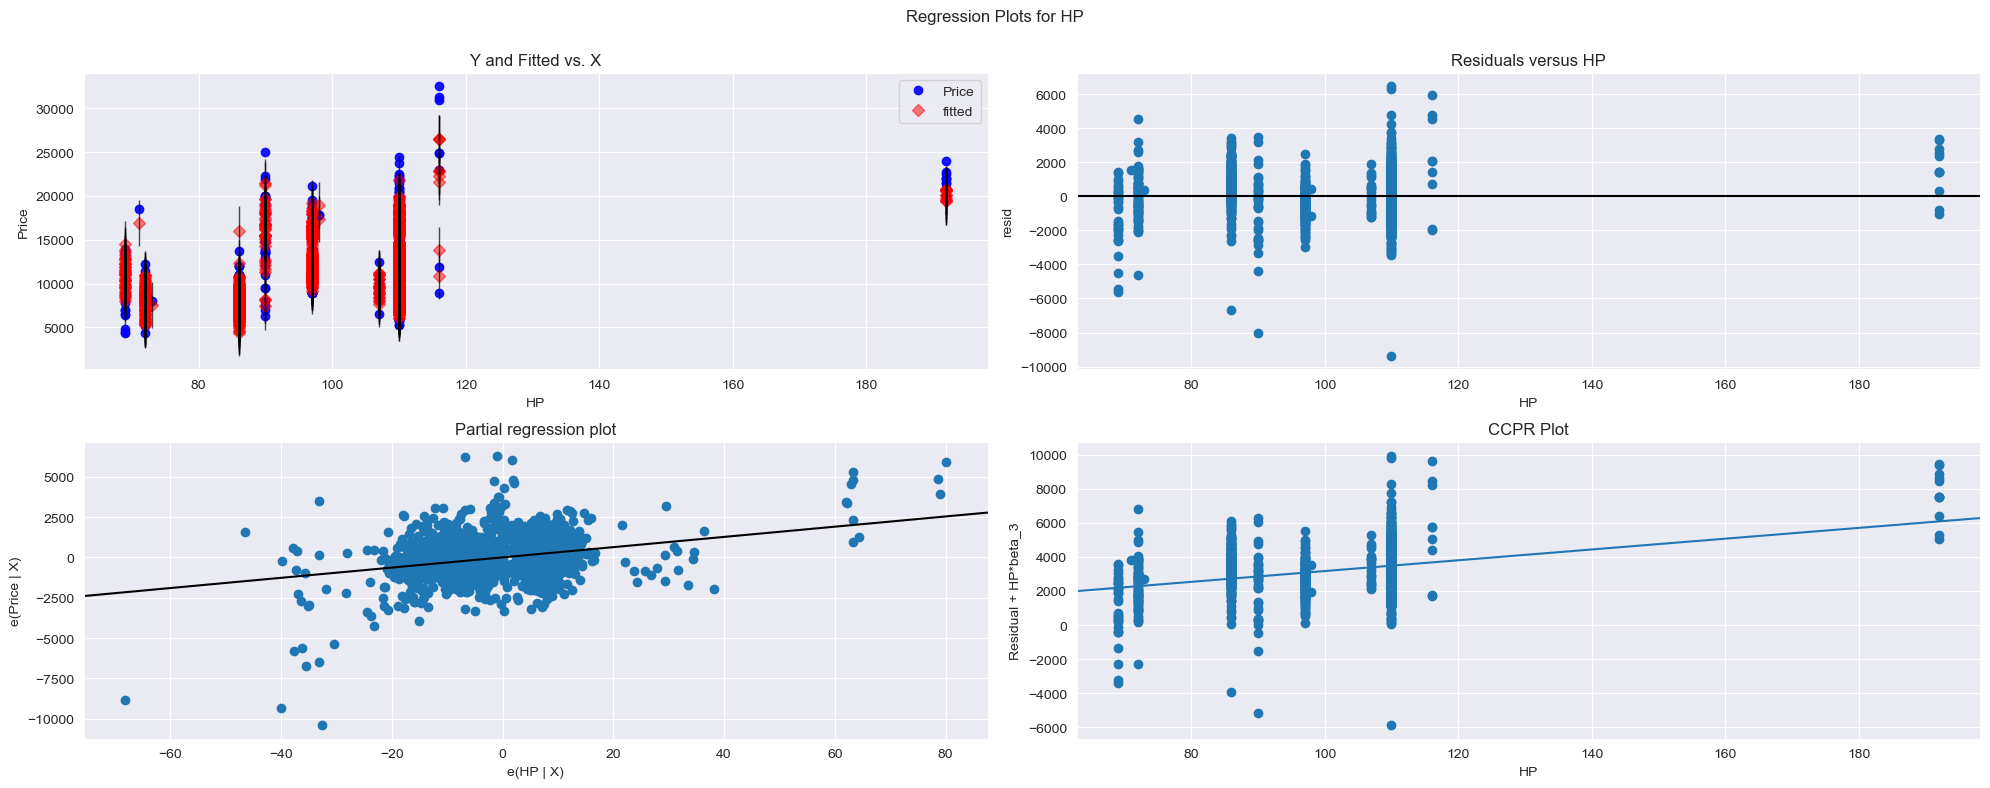

In [37]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

eval_env: 1


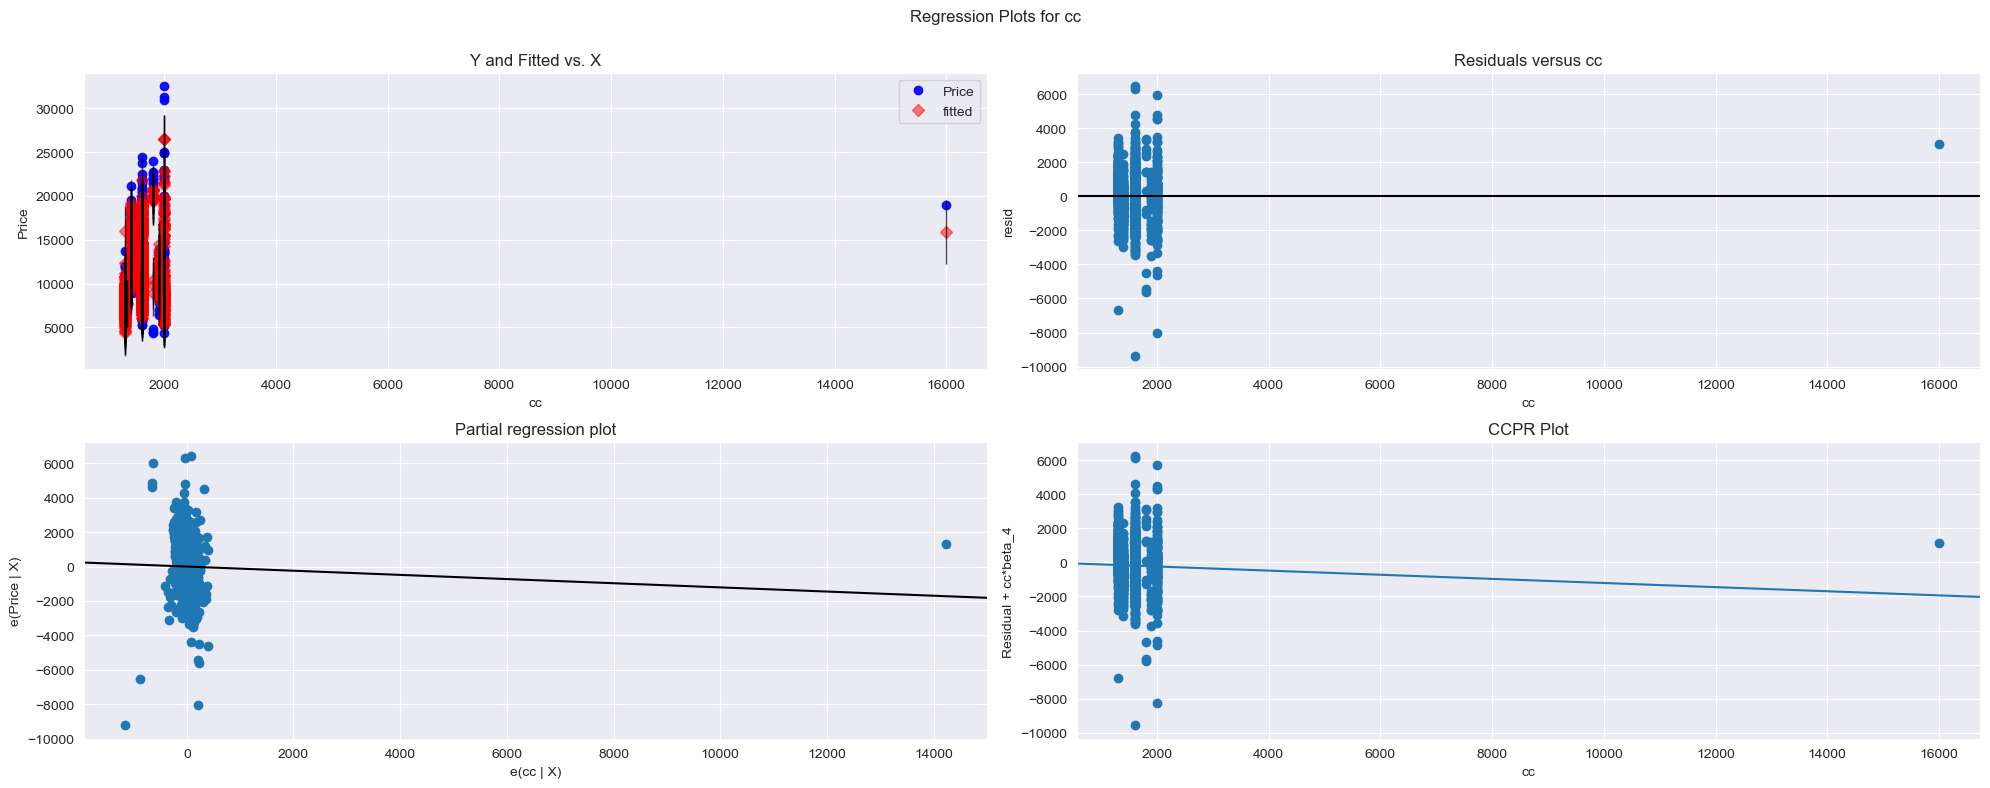

In [38]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()

eval_env: 1


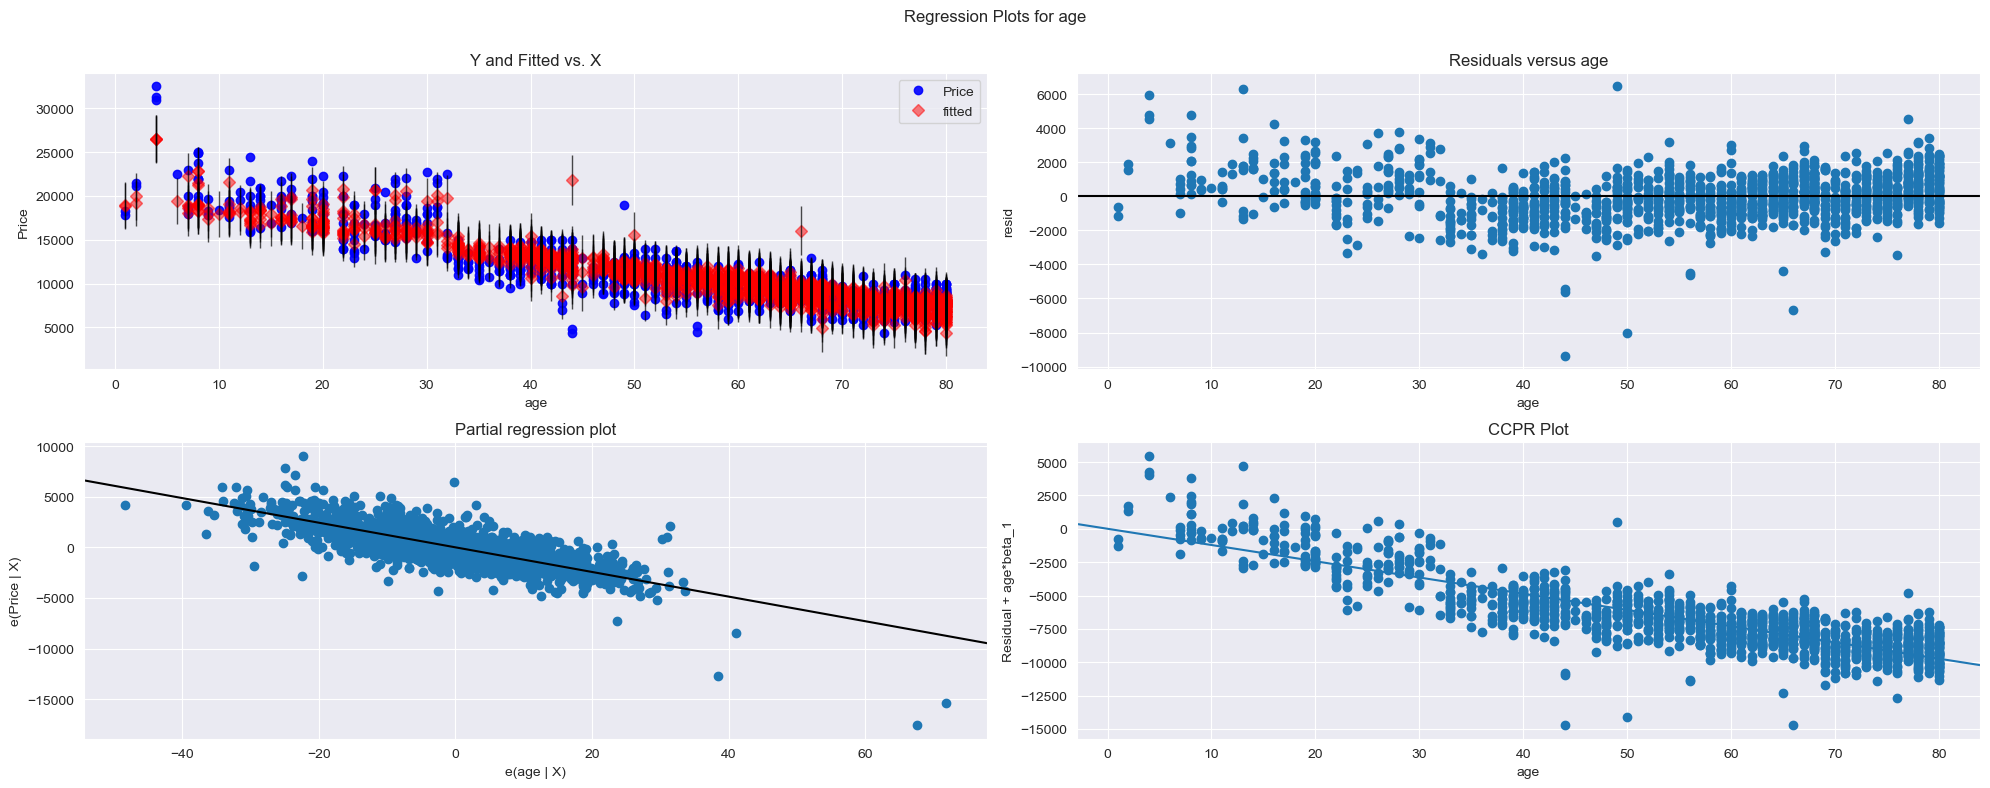

In [39]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"age",fig=fig)
plt.show()

eval_env: 1


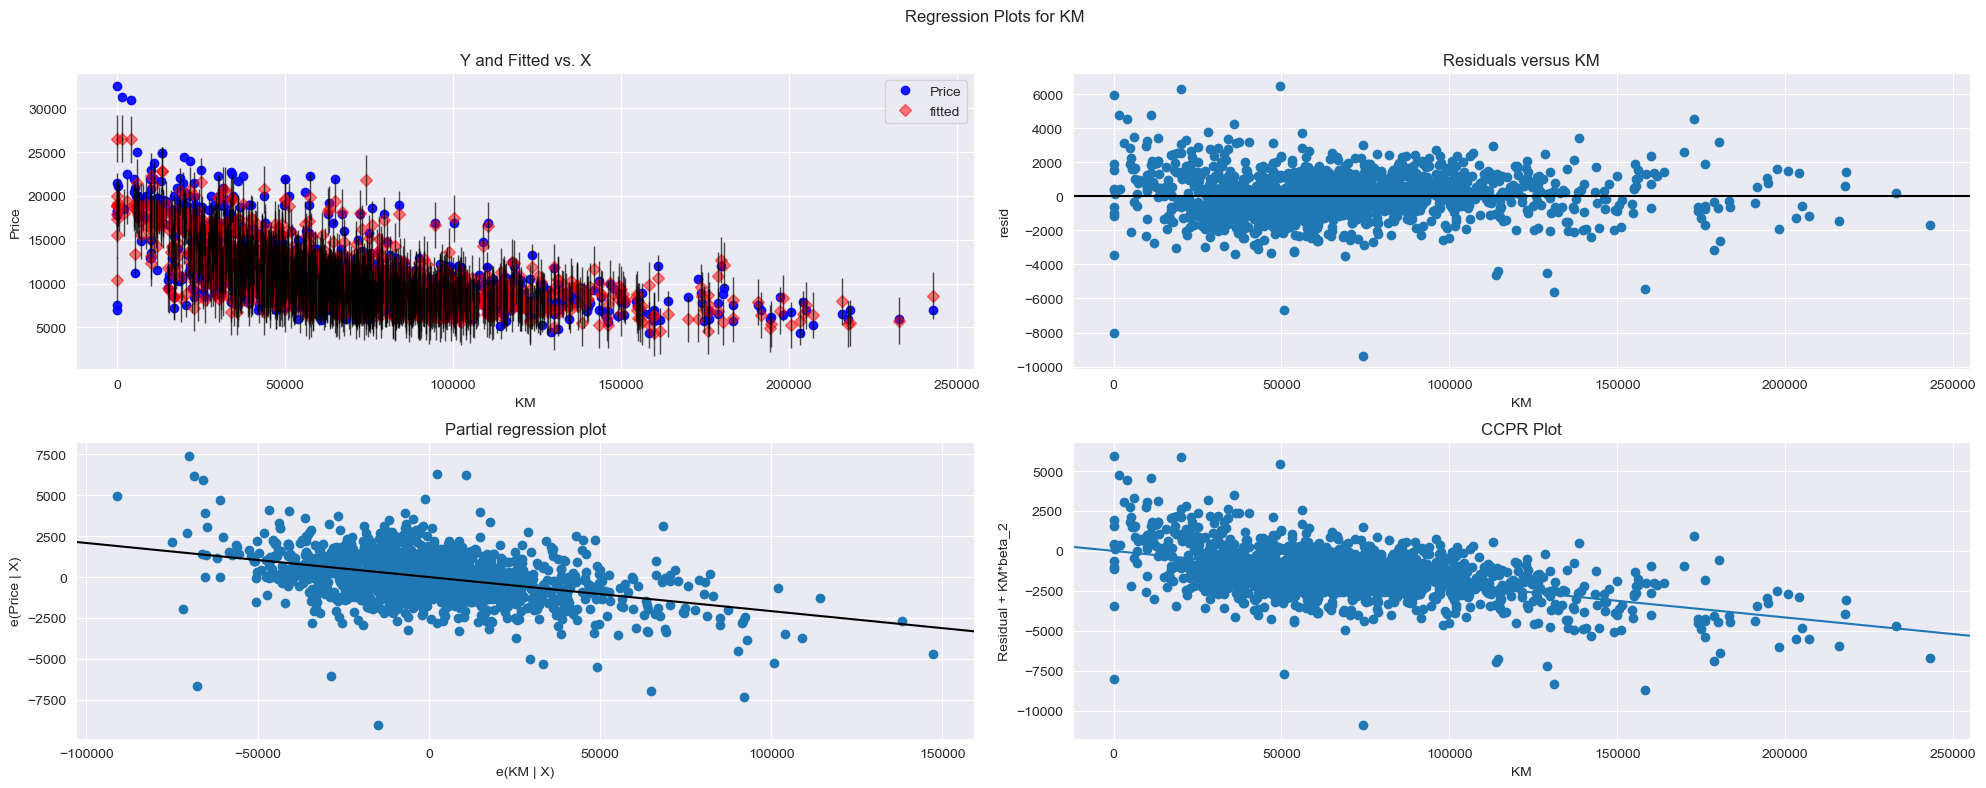

In [40]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

eval_env: 1


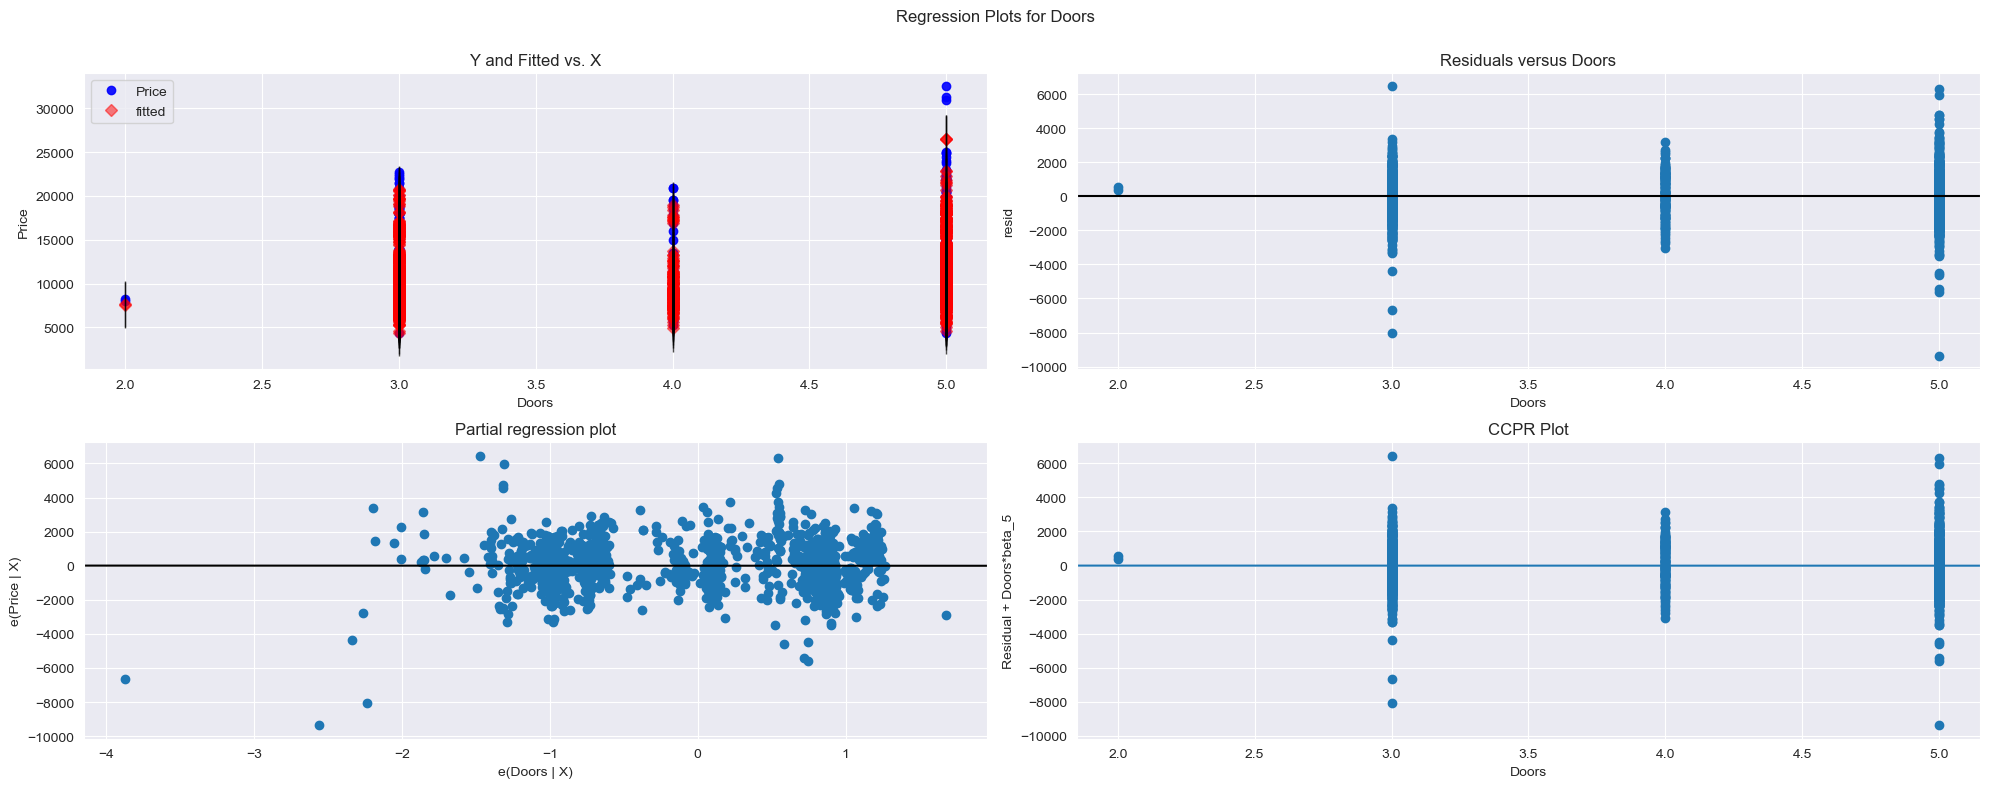

In [42]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

eval_env: 1


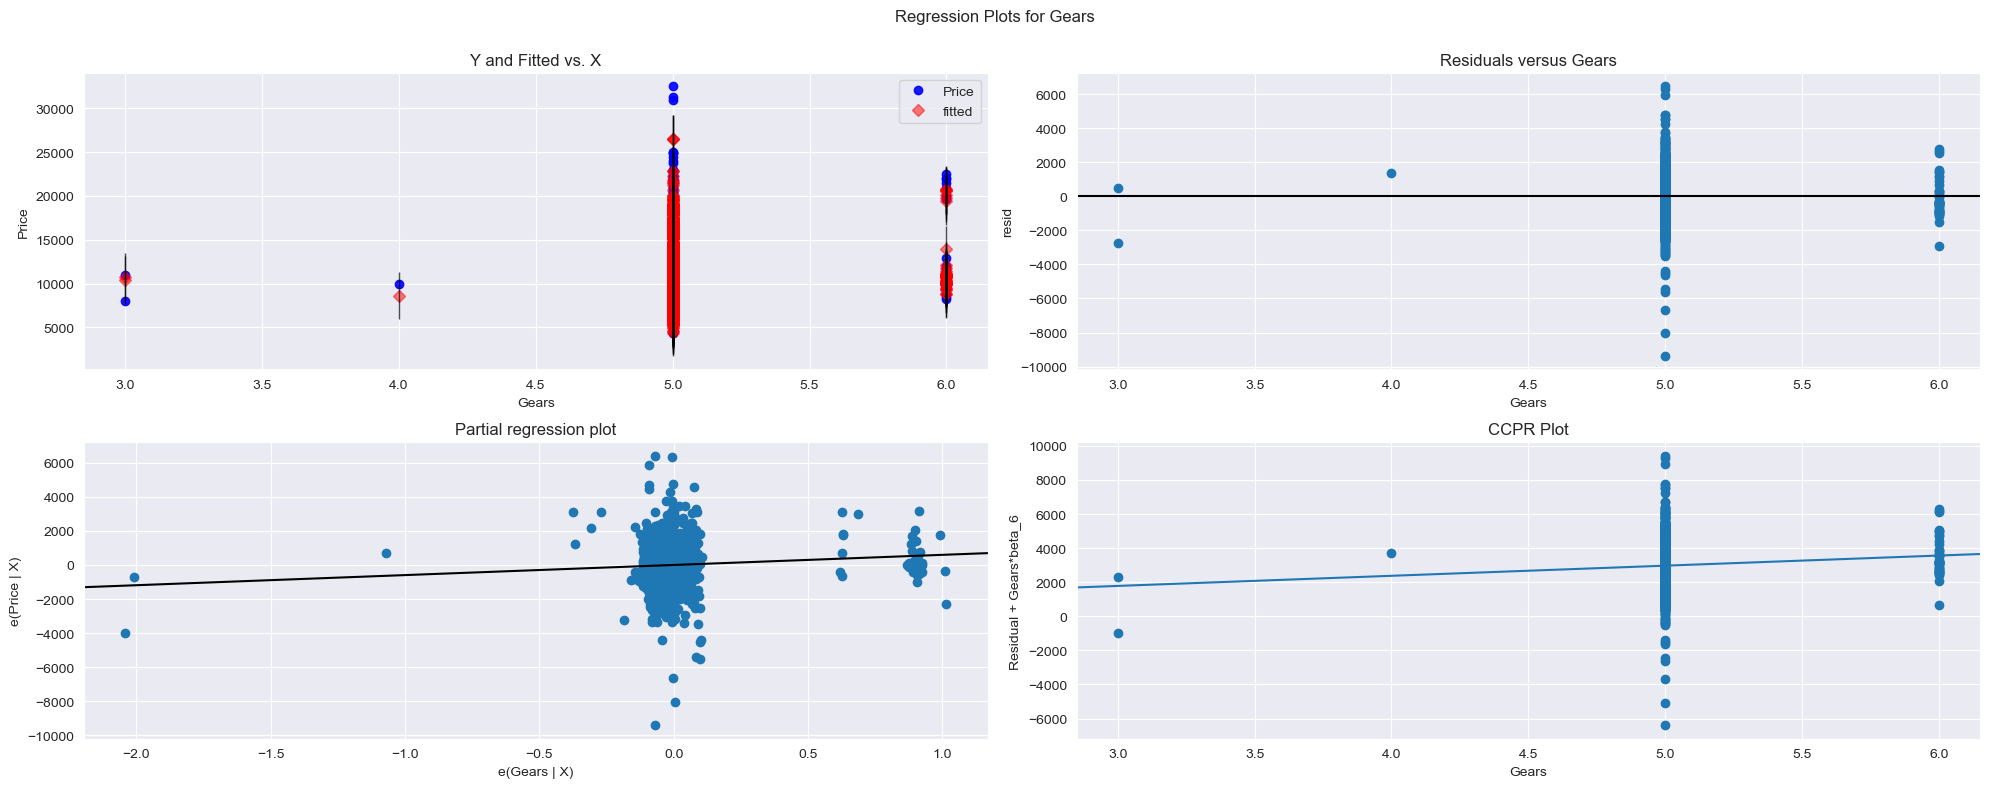

In [43]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

eval_env: 1


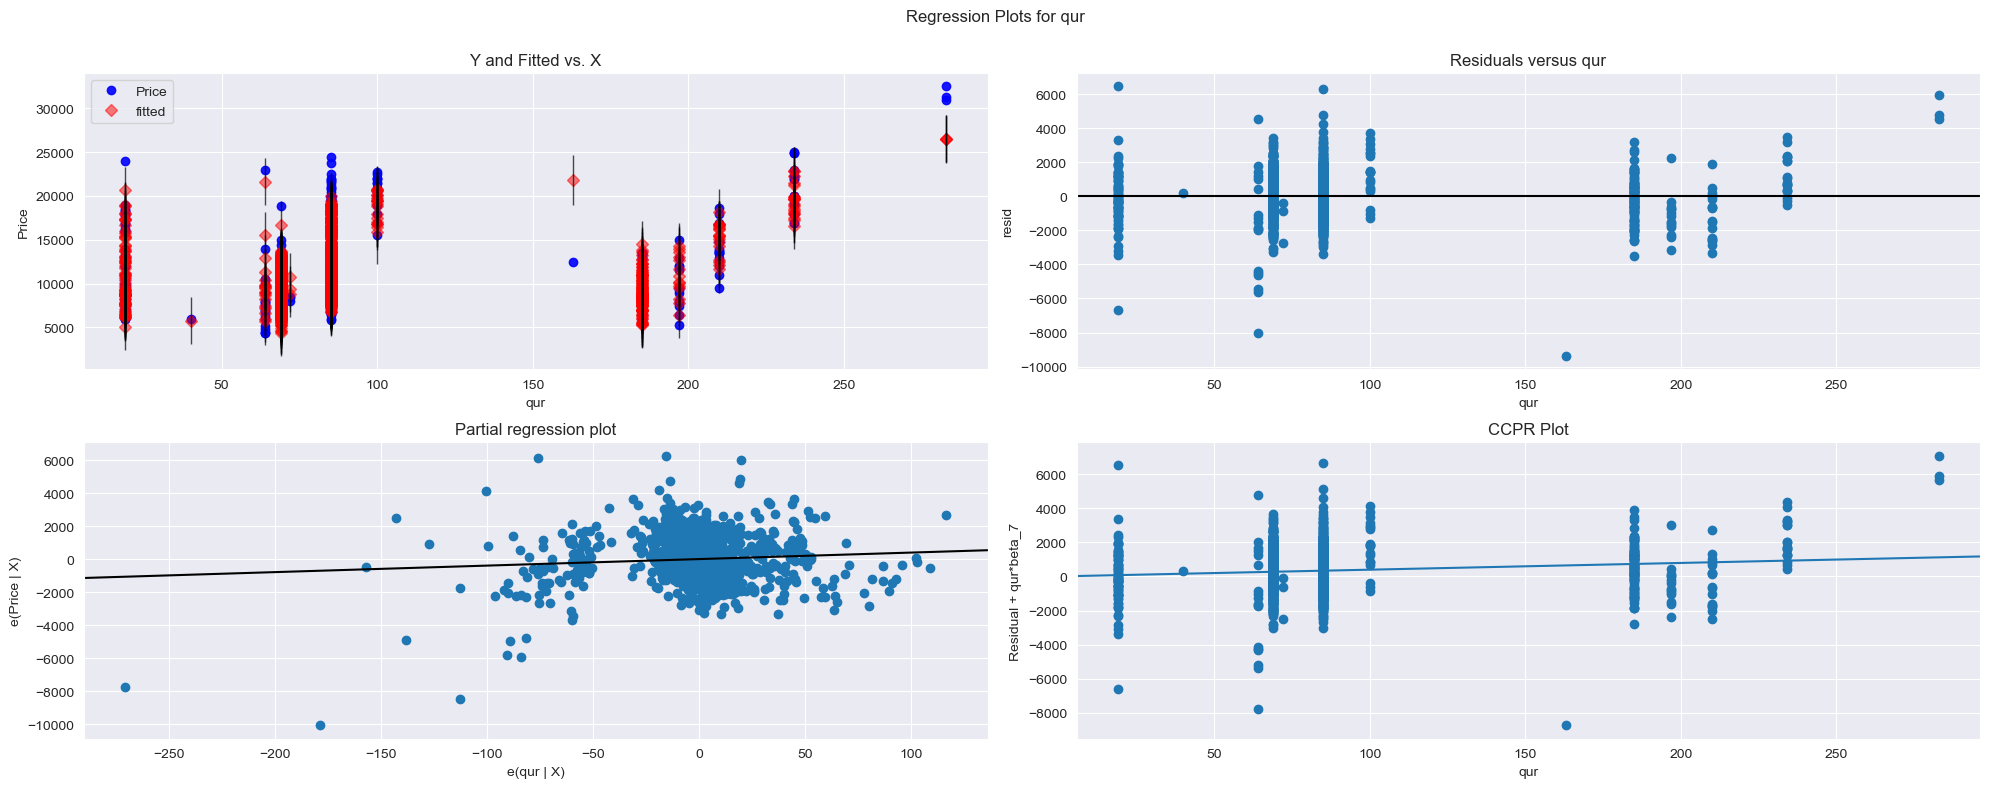

In [44]:
fig=plt.figure(figsize=(20,8))
sm.graphics.plot_regress_exog(model,"qur",fig=fig)
plt.show()

# model delection diagnostics

# detecting influencers/outliers

# cookes distance

In [46]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [47]:
toy.shape

(1436, 9)

In [48]:
k=8
n=1436
3*(k+1)/n

0.018802228412256268

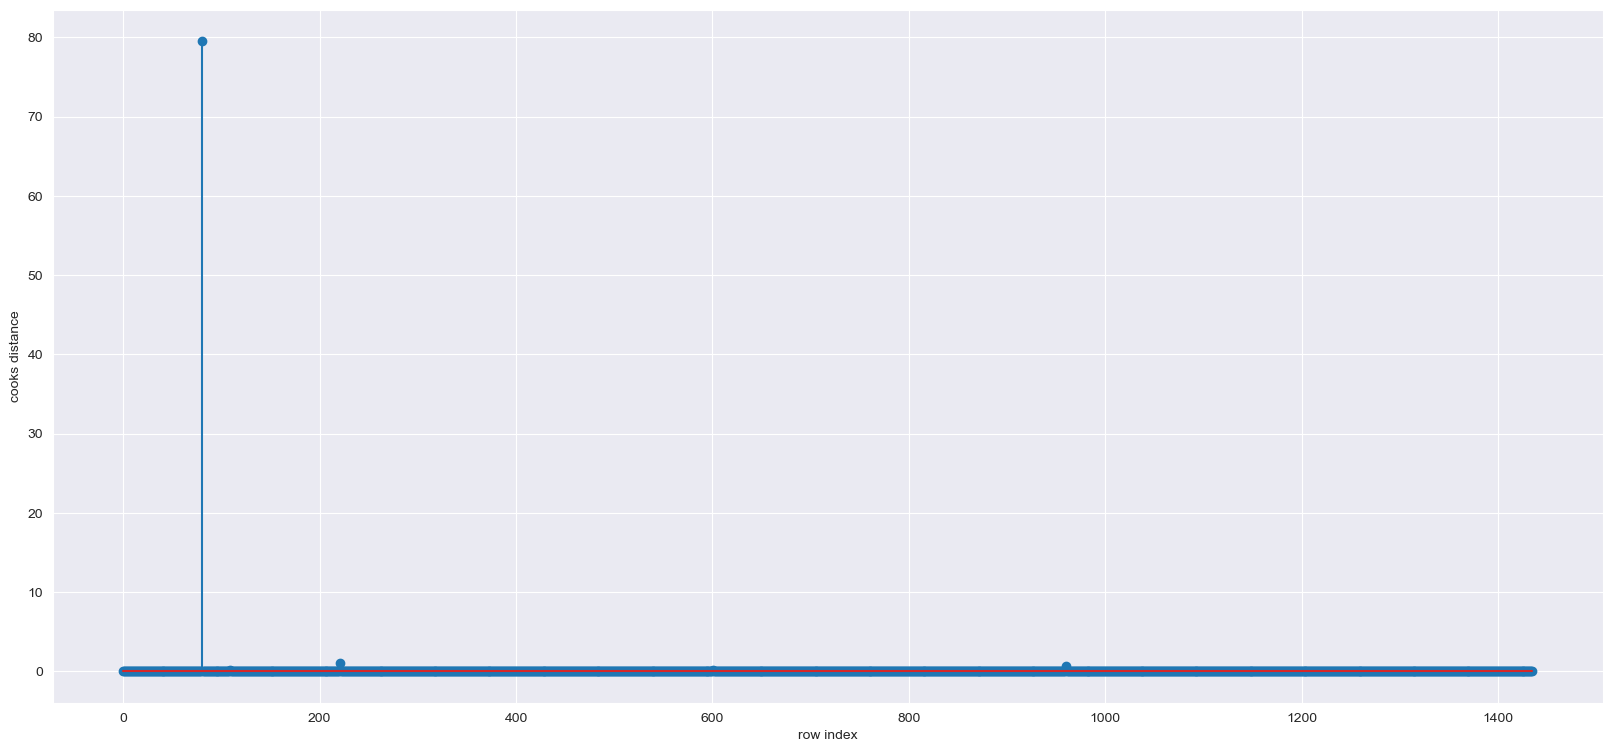

In [50]:
fig=plt.figure(figsize=(20,9))
plt.stem(np.arange(len(toy)),np.round(c, 3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [51]:
np.where(c>0.018)

(array([  14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058], dtype=int64),)

# improving the model

In [53]:
toy2=toy.drop(toy.index[[14,   16,   49,   80,  109,  110,  111,  141,  191,  192,  221,
         523,  601,  654,  960,  991, 1058]],axis=0).reset_index()

In [54]:
toy2=toy2.drop(['index'],axis=1)

In [55]:
toy2

,Price,age,KM,HP,cc,Doors,Gears,qur,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1414,7500,69,20544,86,1300,3,5,69,1025
1415,10845,72,19000,86,1300,3,5,69,1015
1416,8500,71,17016,86,1300,3,5,69,1015
1417,7250,70,16916,86,1300,3,5,69,1015


# build model

In [60]:
final_ml_v=smf.ols('Price~age+KM+HP+cc+Doors+Gears+qur+Weight',data=toy2).fit()

In [61]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8876657300062551, 24047.875456639104)

In [62]:
final_ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1393.
Date:                Tue, 24 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:34:53   Log-Likelihood:                -12015.
No. Observations:                1419   AIC:                         2.405e+04
Df Residuals:                    1410   BIC:                         2.410e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.44e+04   1490.455     -9.663      0.000   -1.73e+04   -1.15e+04
age         -111.4226      2.398    -46.467      0.000    -116.126    -106.719
KM            -0.0175      0.001    -15.347      0.000      -0.020      -0.015
HP            28.9815      2.768     10.472      0.000      23.552      34.410
cc            -3.3519      0.299    -11.216      0.000      -3.938      -2.766
Doors       -131.7533     36.184     -3.641      0.000    -202.733     -60.773
Gears        308.8824    180.506      1.711      0.087     -45.206     662.971
qur            2.1111      1.358      1.555      0.120      -0.553       4.775
Weight        31.4161      1.395     22.514      0.000      28.679      34.153
==============================================================================
Omnibus:                       47.323   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.233
Skew:                           0.209   Prob(JB):                     2.09e-21
Kurtosis:                       4.198   Cond. No.                     3.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""